# 이진 분류(Binary Classification)
### 당뇨병 발병 유무를 예측하는 이진 분류 문제
---
- 데이터 셋: diabetes.csv

### 필요한 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### 데이터 준비

In [ ]:
# !gdown https://raw.githubusercontent.com/devdio/datasets/main/diabetes.csv

Downloading...
From: https://raw.githubusercontent.com/devdio/datasets/main/diabetes.csv
To: /content/diabetes.csv
23.9kB [00:00, 23.6MB/s]       


In [ ]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.shape

(768, 9)

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.isna().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
X = diabetes.drop(['Outcome'], axis=1)
y = diabetes['Outcome']

- 데이터 분리: 학습 데이터, 테스트 데이터

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(614, 8) (154, 8)
(614,) (154,)


- 표준화(Standardization)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
y_train = y_train.values

In [ ]:
X_train_s.shape

(614, 8)

### 모델링(Modeling)

In [ ]:
def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation='relu', input_shape=(8,)), 
      layers.Dense(8, activation='relu'), 
      layers.Dense(1, activation='sigmoid')
  ])

  return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 8)                 520       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,105
Trainable params: 1,105
Non-trainable params: 0
_________________________________________________________________


### 컴파일(Compile)

In [ ]:
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['acc']
    )

### 학습(Training)

In [ ]:
EPOCHS = 100
BATCH_SIZE = 32

history = model.fit(X_train_s, y_train, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_split=0.2, 
                    verbose=1)

Epoch 1/100
16/16 [==============================] - 3s 39ms/step - loss: 0.7045 - acc: 0.4277 - val_loss: 0.6944 - val_acc: 0.5122
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 0.6662 - acc: 0.6090 - val_loss: 0.6637 - val_acc: 0.6911
Epoch 3/100
16/16 [==============================] - 0s 14ms/step - loss: 0.6434 - acc: 0.6965 - val_loss: 0.6381 - val_acc: 0.7317
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6203 - acc: 0.7495 - val_loss: 0.6111 - val_acc: 0.7480
Epoch 5/100
16/16 [==============================] - 0s 9ms/step - loss: 0.5969 - acc: 0.7760 - val_loss: 0.5813 - val_acc: 0.7642
Epoch 6/100
16/16 [==============================] - 0s 9ms/step - loss: 0.5726 - acc: 0.7882 - val_loss: 0.5524 - val_acc: 0.7724
Epoch 7/100
16/16 [==============================] - 0s 8ms/step - loss: 0.5488 - acc: 0.7862 - val_loss: 0.5275 - val_acc: 0.7886
Epoch 8/100
16/16 [==============================] - 0s 8ms/step - loss: 0.5274 -

- 학습 과정 시각화

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

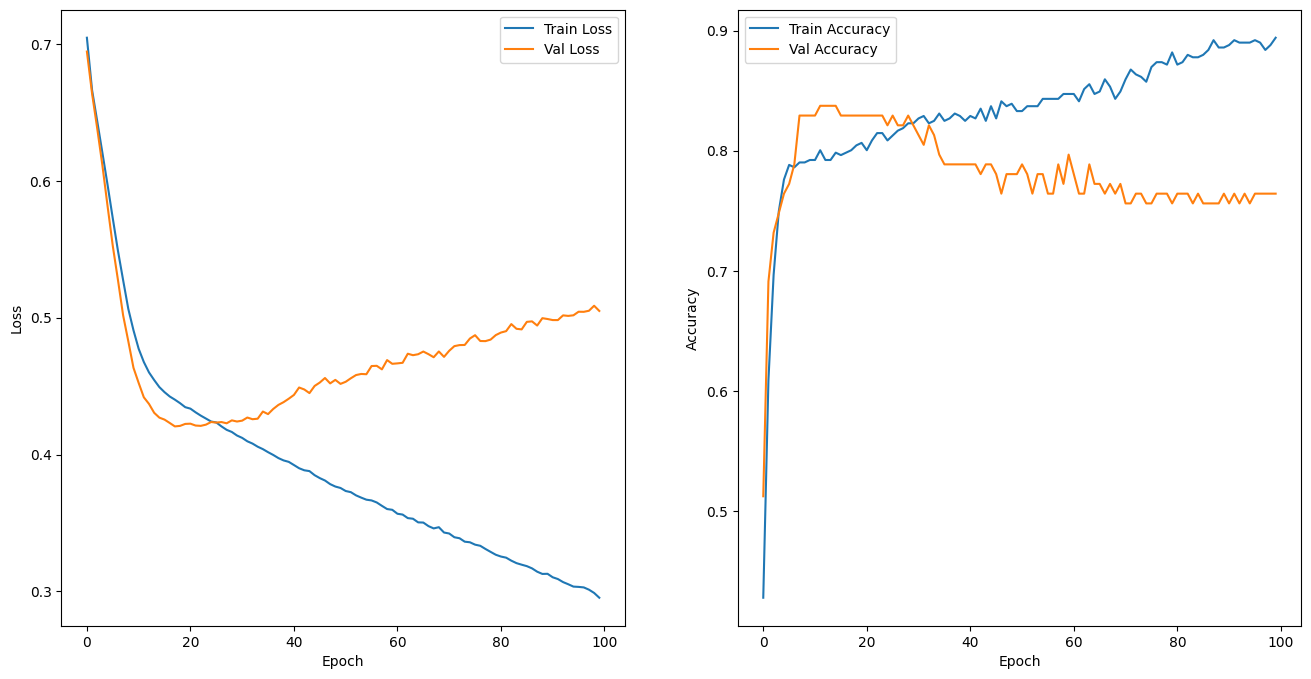

In [ ]:
plot_history(history)

### 평가(Evaluation)

In [ ]:
model.evaluate(X_train_s, y_train)

20/20 [==============================] - 0s 6ms/step - loss: 0.3352 - acc: 0.8697


[0.3351649045944214, 0.8697068691253662]

### 예측(Prediction)

In [ ]:
X_test_s = scaler.transform(X_test)
y_test = y_test.values

In [ ]:
model.evaluate(X_test_s, y_test)

5/5 [==============================] - 0s 5ms/step - loss: 0.5416 - acc: 0.7338


[0.5415734052658081, 0.7337662577629089]

In [ ]:
y_pred = model.predict(X_test_s)

5/5 [==============================] - 0s 7ms/step


In [ ]:
y_pred = y_pred.flatten()
y_pred = (y_pred>0.5).astype('int')
y_pred

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

- 혼동 행렬(confusion matrix)

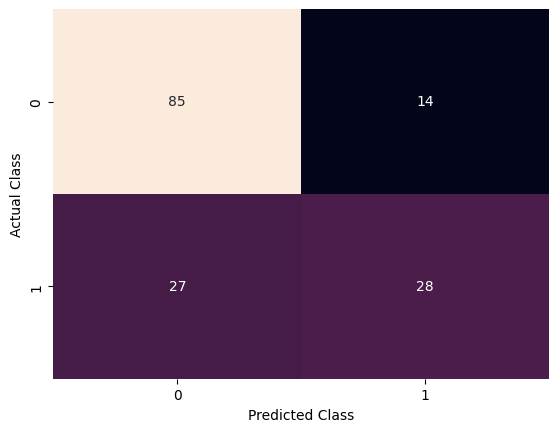

In [ ]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, cbar=False)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()